In [1]:
import scripts.dataset.oze as script

import pytorch_lightning as pl
import matplotlib.pyplot as plt
import numpy as np

# Reload python packages when changed
%load_ext autoreload
%autoreload 2

# Matplotlib defaults
plt.rcParams.update({
    "font.size": 25,
    "figure.figsize": (25, 5)
})

class args:
    batch_size=16
    num_workers=2

In [2]:
# Load validation dataset
dm = script.get_datamodule(args)
dm.setup()
dataloader_val = dm.val_dataloader()
# Load model from checkpoint
litmodule = script.OzeTrainer.load_from_checkpoint("checkpoints/oze-draft/last.ckpt", model=script.model)
# Load trainer for evaluation loop
trainer = pl.Trainer(gpus=[2])

/space/homes/maxcohen/vqvae/vqvae/oze/utils.py:69: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  occupancy = int(date < date_start_lockdown)
/space/homes/maxcohen/vqvae/vqvae/oze/utils.py:72: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if date_end_lockdown < date:
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


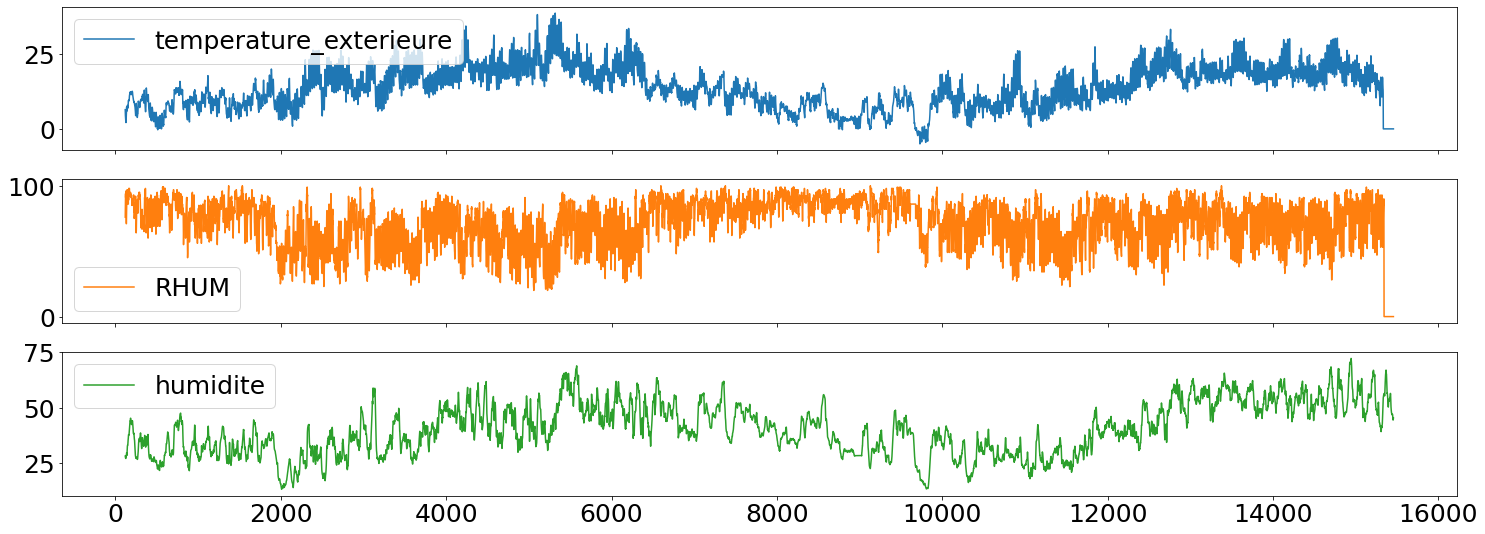

In [3]:
def plot_df(df, dataset):
    inputs = dataset.input_columns
    outputs = dataset.target_columns
    
    df[[*inputs, *outputs]].plot(
        subplots=True,
        figsize=(25, 3*(len(inputs) + len(outputs)))
    )
plot_df(dm.df, dm.dataset_train)

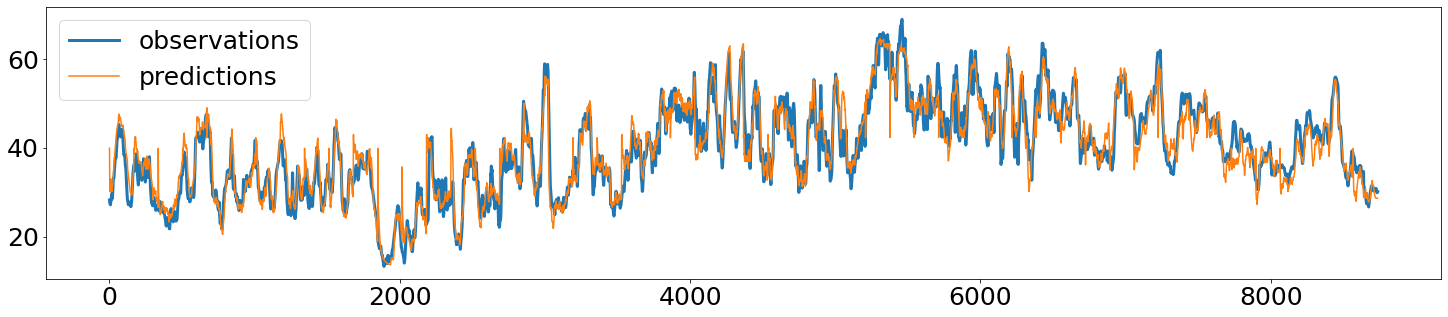

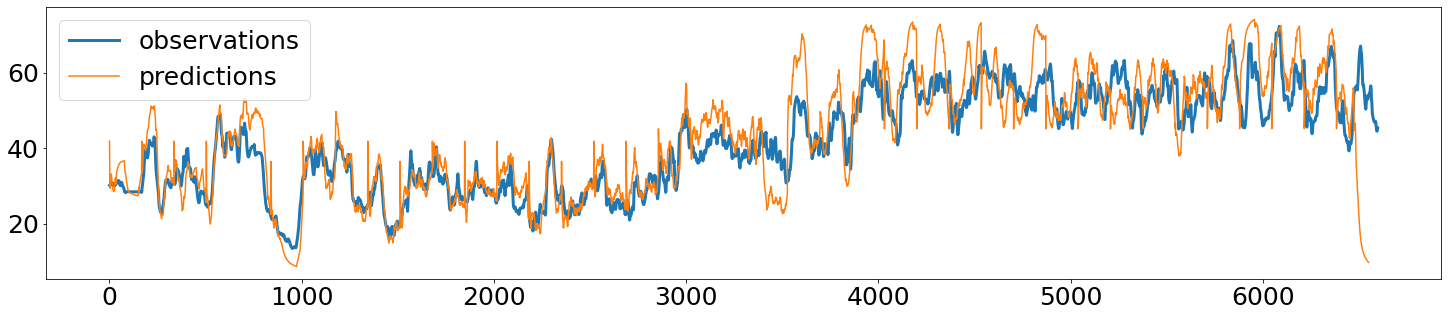

In [4]:
from oze.utils import plot_predictions
model = script.model.eval()
plot_predictions(model, dm.dataset_train)
plot_predictions(model, dm.dataset_val)